# DATA PREPROCESSING

# Tweets Preprocessing and Cleaning


## The preprocessing of the text data is an essential step as it makes the raw text ready for mining, i.e., it becomes easier to extract information from the text and apply machine learning algorithms to it. If we skip this step then there is a higher chance that you are working with noisy and inconsistent data. The objective of this step is to clean noise those are less relevant to find the sentiment of tweets such as punctuation, special characters, numbers, and terms which don’t carry much weightage in context to the text.

## In one of the later stages, we will be extracting numeric features from our Twitter text data. This feature space is created using all the unique words present in the entire data. So, if we preprocess our data well, then we would be able to get a better quality feature space.

## Let’s first read our data and load the necessary libraries. You can download the datasets from here.

In [1]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [2]:
train  = pd.read_csv('french_f1.csv')
test = pd.read_csv('french_f2.csv')

In [3]:
train.drop(columns=['polarity'],inplace=True)
test.drop(columns=['polarity'],inplace=True)

## We can also think of getting rid of the punctuations, numbers and even special characters since they wouldn’t help in differentiating different kinds of tweets.
## Most of the smaller words do not add much value. For example, ‘pdx’, ‘his’, ‘all’. So, we will try to remove them as well from our data.
## Once we have executed the above  steps, we can split every tweet into individual words or tokens which is an essential step in any NLP task.
## In the some tweet, there is a word ‘love’. We might also have terms like loves, loving, lovable, etc. in the rest of the data. These terms are often used in the same context. If we can reduce them to their root word, which is ‘love’, then we can reduce the total number of unique words in our data without losing a significant amount of information.

In [4]:
combi = train.append(test, ignore_index=True)

In [5]:
# remove twitter handles (@user)
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 
combi['tidy_tweet'] = np.vectorize(remove_pattern)(combi['tweet_text'], "@[\w]*")

In [6]:

combi

,SN,tweet_text,tidy_tweet
0,1,How is there the Corona Light,How is there the Corona Light
1,2,But big m me without a c j is filthy treated m...,But big m me without a c j is filthy treated m...
2,3,thank you is good bah va cu an adventure every 2,thank you is good bah va cu an adventure every 2
3,4,How to call you friends to the south of France...,How to call you friends to the south of France...
4,5,Simone Simons Coen Janssen and Th be Corona Mo...,Simone Simons Coen Janssen and Th be Corona Mo...
...,...,...,...
1171,1172,Chet Faker Ya of course gan 3,Chet Faker Ya of course gan 3
1172,1173,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...
1173,1174,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...
1174,1175,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...


# Removing Punctuations, Numbers, and Special Characters
## As discussed, punctuations, numbers and special characters do not help much. It is better to remove them from the text just as we removed the twitter handles. Here we will replace everything except characters and hashtags with spaces.

In [7]:
# remove special characters, numbers, punctuations
combi['tidy_tweet'] = combi['tidy_tweet'].str.replace("[^a-zA-Z#]", " ")

In [8]:
combi

,SN,tweet_text,tidy_tweet
0,1,How is there the Corona Light,How is there the Corona Light
1,2,But big m me without a c j is filthy treated m...,But big m me without a c j is filthy treated m...
2,3,thank you is good bah va cu an adventure every 2,thank you is good bah va cu an adventure every
3,4,How to call you friends to the south of France...,How to call you friends to the south of France...
4,5,Simone Simons Coen Janssen and Th be Corona Mo...,Simone Simons Coen Janssen and Th be Corona Mo...
...,...,...,...
1171,1172,Chet Faker Ya of course gan 3,Chet Faker Ya of course gan
1172,1173,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...
1173,1174,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...
1174,1175,Here it is the m metamorphosis is running more...,Here it is the m metamorphosis is running more...


# Removing Short Words
## We have to be a little careful here in selecting the length of the words which we want to remove. So, I have decided to remove all the words having length 3 or less. For example, terms like “hmm”, “oh” are of very little use. It is better to get rid of them.

In [9]:
combi['tidy_tweet'] = combi['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [10]:
combi.head()

,SN,tweet_text,tidy_tweet
0,1,How is there the Corona Light,there Corona Light
1,2,But big m me without a c j is filthy treated m...,without filthy treated myself drink Corona Ken...
2,3,thank you is good bah va cu an adventure every 2,thank good adventure every
3,4,How to call you friends to the south of France...,call friends south France crown corona dels re...
4,5,Simone Simons Coen Janssen and Th be Corona Mo...,Simone Simons Coen Janssen Corona Montr Januar...


# Tokenization
## Now we will tokenize all the cleaned tweets in our dataset. Tokens are individual terms or words, and tokenization is the process of splitting a string of text into tokens.



In [11]:
tokenized_tweet = combi['tidy_tweet'].apply(lambda x: x.split())
tokenized_tweet.head()

0                               [there, Corona, Light]
1    [without, filthy, treated, myself, drink, Coro...
2                      [thank, good, adventure, every]
3    [call, friends, south, France, crown, corona, ...
4    [Simone, Simons, Coen, Janssen, Corona, Montr,...
Name: tidy_tweet, dtype: object

# Stemming
## Stemming is a rule-based process of stripping the suffixes (“ing”, “ly”, “es”, “s” etc) from a word. For example, For example – “play”, “player”, “played”, “plays” and “playing” are the different variations of the word – “play”.

In [12]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0                               [there, corona, light]
1    [without, filthi, treat, myself, drink, corona...
2                       [thank, good, adventur, everi]
3    [call, friend, south, franc, crown, corona, de...
4    [simon, simon, coen, janssen, corona, montr, j...
Name: tidy_tweet, dtype: object

# Now let’s stitch these tokens back together.

In [13]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

combi['tidy_tweet'] = tokenized_tweet

In [14]:
combi

,SN,tweet_text,tidy_tweet
0,1,How is there the Corona Light,there corona light
1,2,But big m me without a c j is filthy treated m...,without filthi treat myself drink corona kent ...
2,3,thank you is good bah va cu an adventure every 2,thank good adventur everi
3,4,How to call you friends to the south of France...,call friend south franc crown corona del rei k...
4,5,Simone Simons Coen Janssen and Th be Corona Mo...,simon simon coen janssen corona montr januari ...
...,...,...,...
1171,1172,Chet Faker Ya of course gan 3,chet faker cours
1172,1173,Here it is the m metamorphosis is running more...,here metamorphosi run more than corona good
1173,1174,Here it is the m metamorphosis is running more...,here metamorphosi run more than corona good
1174,1175,Here it is the m metamorphosis is running more...,here metamorphosi run more than corona good


# Story Generation and Visualization from Tweets
## In this section, we will explore the cleaned tweets text. Exploring and visualizing data, no matter whether its text or any other data, is an essential step in gaining insights. Do not limit yourself to only these methods told in this tutorial, feel free to explore the data as much as possible.

## Before we begin exploration, we must think and ask questions related to the data in hand. A few probable questions are as follows:

## What are the most common words in the entire dataset?
## What are the most common words in the dataset for negative and positive tweets, respectively?
## How many hashtags are there in a tweet?
## Which trends are associated with my dataset?
## Which trends are associated with either of the sentiments? Are they compatible with the sentiments?

# A) Understanding the common words used in the tweets: WordCloud
## Now I want to see how well the given sentiments are distributed across the train dataset. One way to accomplish this task is by understanding the common words by plotting wordclouds.

## A wordcloud is a visualization wherein the most frequent words appear in large size and the less frequent words appear in smaller sizes.

## Let’s visualize all the words our data using the wordcloud plot.

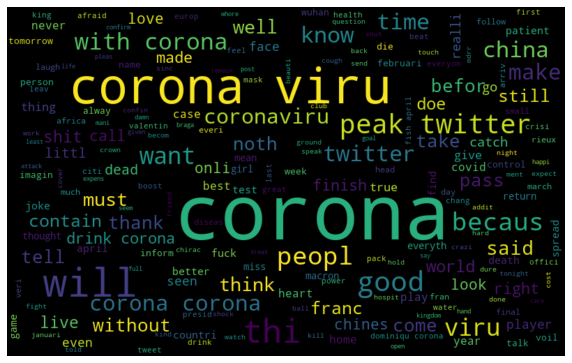

In [15]:
all_words = ' '.join([text for text in combi['tidy_tweet']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Understanding the impact of Hashtags on tweets sentiment
## Hashtags in twitter are synonymous with the ongoing trends on twitter at any particular point in time. We should try to check whether these hashtags add any value to our sentiment analysis task, i.e., they help in distinguishing tweets into the different sentiments.

In [16]:
# function to collect hashtags
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags

In [33]:
# extracting hashtags from tweets

HT_regular = hashtag_extract(combi['tidy_tweet'])



# unnesting list
HT_regular = sum(HT_regular,[])


# Now that we have prepared our lists of hashtags for both the sentiments, we can plot the top n hashtags. So, first let’s check the hashtags in the non-racist/sexist tweets.

In [1]:
# a = nltk.FreqDist(HT_regular)
# d = pd.DataFrame({'Hashtag': list(a.keys()),
#                   'Count': list(a.values())})
# # selecting top 10 most frequent hashtags     
# d = d.nlargest(columns="Count", n = 10) 
# plt.figure(figsize=(16,5))
# ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
# ax.set(ylabel = 'Count')
# plt.show()

In [19]:
from textblob import TextBlob

In [20]:
list1 = list(combi['tidy_tweet'])
l=[]

In [21]:
for i in list1:
    b = TextBlob(i)
    if b.sentiment[0] <0:
        l.append('Negative')
    elif b.sentiment[0] > 0:
        l.append('Positive')
    else:
        l.append('Neutral')

In [22]:
df1 = pd.DataFrame()

In [23]:
df1['text']=list1
df1['Sentiment']=l

In [24]:
df1

,text,Sentiment
0,there corona light,Positive
1,without filthi treat myself drink corona kent ...,Neutral
2,thank good adventur everi,Positive
3,call friend south franc crown corona del rei k...,Neutral
4,simon simon coen janssen corona montr januari ...,Neutral
...,...,...
1171,chet faker cours,Neutral
1172,here metamorphosi run more than corona good,Positive
1173,here metamorphosi run more than corona good,Positive
1174,here metamorphosi run more than corona good,Positive


In [25]:
class_count = df1['Sentiment'].value_counts()

In [26]:
class_count 

Neutral     659
Positive    335
Negative    182
Name: Sentiment, dtype: int64

Text(0, 0.5, 'Number of reviews ')

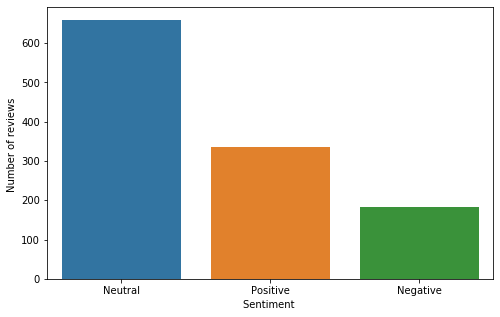

In [27]:
x = np.array(class_count.index)
y = np.array(class_count.values)
plt.figure(figsize=(8,5))
sns.barplot(x,y)
plt.xlabel('Sentiment ')
plt.ylabel('Number of reviews ')

In [28]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='black',
        stopwords=stopwords,
        max_words=200,
        max_font_size=40, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
).generate(str(data))

    fig = plt.figure(1, figsize=(15, 15))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

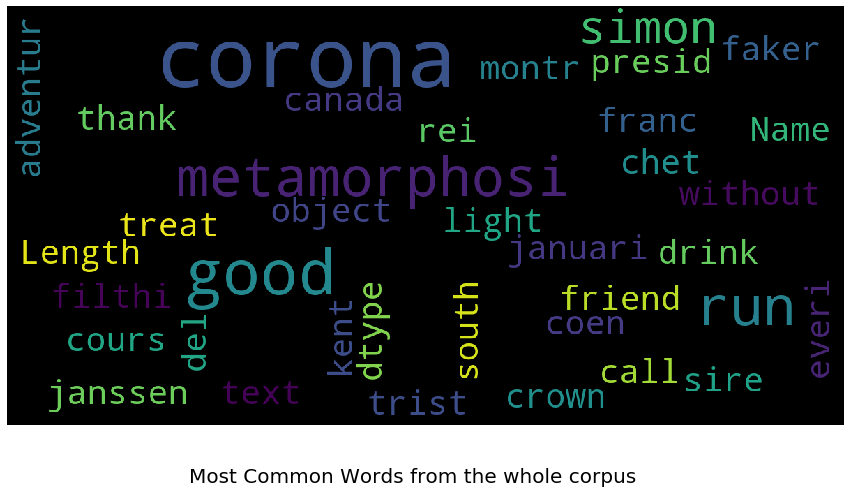

In [29]:
show_wordcloud(df1['text'],'Most Common Words from the whole corpus')

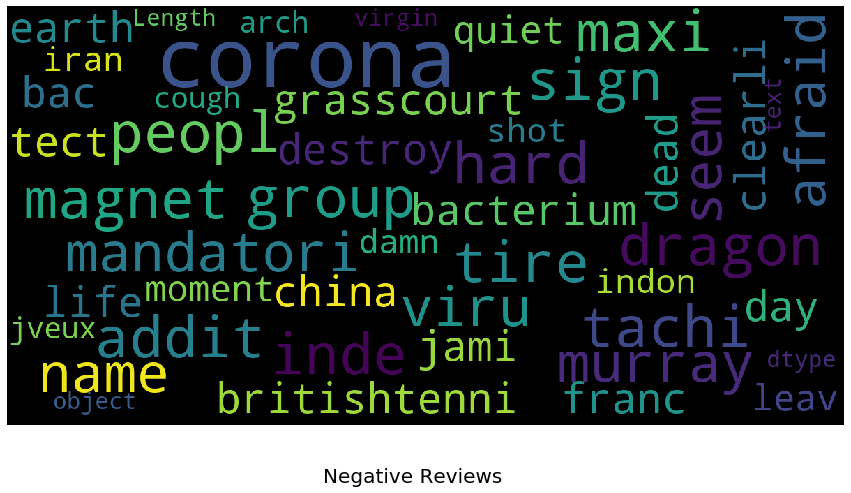

In [30]:

show_wordcloud(df1[df1['Sentiment'] == 'Negative']['text'],'Negative Reviews')

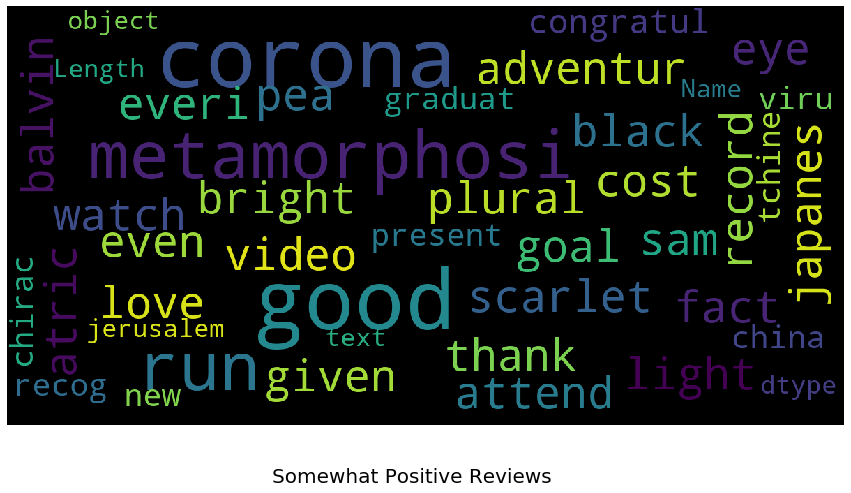

In [31]:
show_wordcloud(df1[df1['Sentiment'] == 'Positive']['text'],'Somewhat Positive Reviews')